In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [61]:
df = pd.read_csv('prosperLoanData (1).csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [62]:
# get overview of the shape and composition of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of the dataset?

The dataset is constructed of almost 114,000 entries and 81 variables.  About half of the variables in this analysis are numeric while the other half is categorical.  Some of the numeric variables are Loan Original Amount, Income Range, and Borrower APR.  Some of the categorical variables are Credit Grade, Prosper Rating Alpha, and Loan Status

### What is/are the main feature(s) of interest in your dataset?¶

Im most interested in how borrower characteristics have changed over time.  Also which borrower characteristics pose the greatest risk.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?¶

I think Loan Status feature that helps me along with the borrower characteristics.  Loan status will tell me if the loan was in good standing or not and will allow me to spot what trends lean towards good standing or not

# Univariate Exploration

In [63]:
df['LoanOriginationQuarter'].dtype

dtype('O')

In [64]:
df_copy = df # make copy of data frame

In [65]:
# put column in datetime
df_copy['LoanOriginationQuarter'] = pd.to_datetime([
    '-'.join(x.split()[::-1]) for x in df_copy['LoanOriginationQuarter']])
# put column in datetime with quarter number
df_copy['LoanOriginationQuarter'] = df_copy['LoanOriginationQuarter'].dt.to_period('Q')



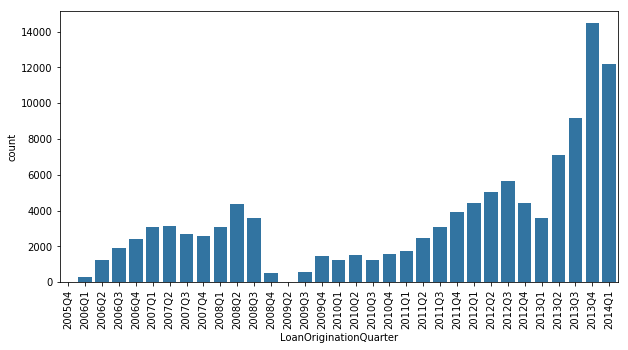

In [66]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy.sort_values('LoanOriginationQuarter'), x = 'LoanOriginationQuarter', color = base_color)
plt.xticks(rotation = 90);

The graph shows a a general increase from q1 2006 to q3 2008 before seeing a huge dip in q4 2008 til q3 2009.  In 2010 there was a steady growth, a dip in q1 2013 before huge growth after that nearly doubling.

In [67]:
df_copy['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [68]:
# convert listing category from numbers to the name they represent

def change_to_name(df_copy):
    if df_copy['ListingCategory (numeric)'] == 0:
        return 'Not Available'
    elif df_copy['ListingCategory (numeric)'] == 1:
        return 'Debt Consolidation'
    elif df_copy['ListingCategory (numeric)'] == 2:
        return 'Home Improvement'
    elif df_copy['ListingCategory (numeric)'] == 3:
        return 'Business'
    elif df_copy['ListingCategory (numeric)'] == 4:
        return 'Personal Loan'
    elif df_copy['ListingCategory (numeric)'] == 5:
        return 'Student Use'
    elif df_copy['ListingCategory (numeric)'] == 6:
        return 'Auto'
    elif df_copy['ListingCategory (numeric)'] == 7:
        return 'Other'
    elif df_copy['ListingCategory (numeric)'] == 9:
        return 'Baby and Adoption'
    elif df_copy['ListingCategory (numeric)'] == 10:
        return 'Boat'
    elif df_copy['ListingCategory (numeric)'] == 11:
        return 'Cosmetic Procedure'
    elif df_copy['ListingCategory (numeric)'] == 12:
        return 'Green Loans'
    elif df_copy['ListingCategory (numeric)'] == 13:
        return 'Houshold Expenses'
    elif df_copy['ListingCategory (numeric)'] == 14:
        return 'Large Purchases'
    elif df_copy['ListingCategory (numeric)'] == 15:
        return 'Medical/Dental'
    elif df_copy['ListingCategory (numeric)'] == 16:
        return 'Motorcycle'
    elif df_copy['ListingCategory (numeric)'] == 17:
        return 'RV'
    elif df_copy['ListingCategory (numeric)'] == 18:
        return 'Taxes'
    elif df_copy['ListingCategory (numeric)'] == 19:
        return 'Vacation'
    elif df_copy['ListingCategory (numeric)'] == 20:
        return 'Wedding Loans'
    else:
        return df_copy['ListingCategory (numeric)']
   

df_copy['ListingCategory(name)'] = df_copy.apply(change_to_name, axis = 1)

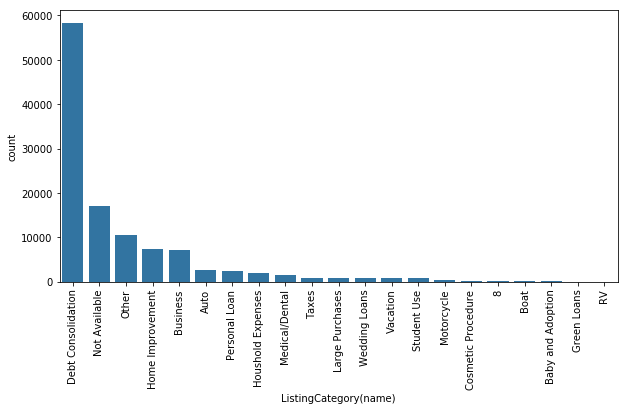

In [69]:
# plot the listing category name
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
cat_order = df_copy['ListingCategory(name)'].value_counts().index
sb.countplot(data = df_copy, x = 'ListingCategory(name)', color = base_color,
            order = cat_order)
plt.xticks(rotation = 90);

The vast majority of loans taken out were for debt consolidation

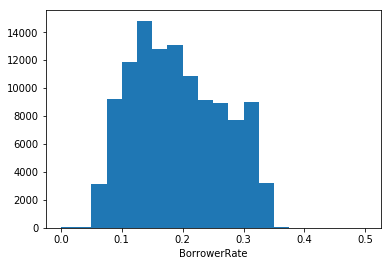

In [70]:
# plot Borrower Rate
bins = np.arange(0, df['BorrowerRate'].max() + 0.025, 0.025)
plt.hist(data = df_copy, x = 'BorrowerRate', bins = bins);
plt.xlabel('BorrowerRate')
plt.show()

In [72]:
df_copy['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

The interest rates on the loans are very high.  The average interest rate on these loans is 19.28%.  The interests rates for the loans are almost as high as a credit card.  Must figure out the reason for debt consolidation loan with a similair interest rate as a credit card.

In [71]:
df_copy['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

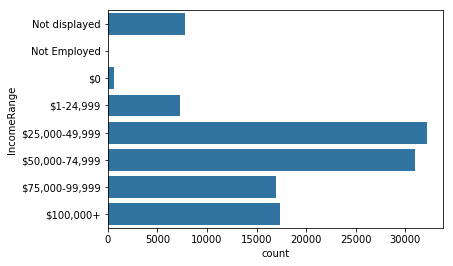

In [74]:
# plot income range
#create order 
Ranges = ['Not displayed', 'Not Employed', '$0', '$1-24,999', '$25,000-49,999', 
                 '$50,000-74,999', '$75,000-99,999', '$100,000+']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):
    income_ranges = pd.api.types.CategoricalDtype(ordered =True, categories = Ranges)
    df_copy['IncomeRange'] = df_copy['IncomeRange'].astype(income_ranges)
else: # pre-v0.21
    df['IncomeRange'] = df['IncomeRange'].astype('category', ordered = True,
                                                categories = Ranges)
    
    #df_sub = df.loc[df['IncomeRange'].isin]
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, y = 'IncomeRange', color = base_color);


The majority of the borrowers make less than 75k per year.  Could be the reason they see the need to take out loans

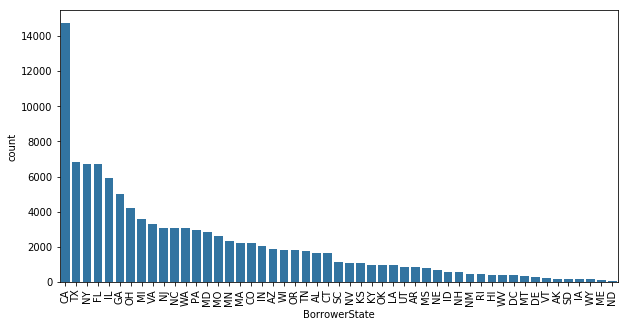

In [73]:
# plot the listing borrower state
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
state_order = df_copy['BorrowerState'].value_counts().index
sb.countplot(data = df_copy, x = 'BorrowerState', color = base_color,
            order = state_order)
plt.xticks(rotation = 90);

The states with the most borrowers are California, Texas, New York, and Florida. Income range by state is an area of interest.  

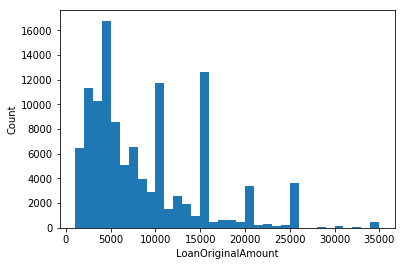

In [75]:
# plot loan original amount
#plt.figure(figsize = [10,5])

#plt.subplot(1,1,1)
bins = np.arange(1000, df_copy['LoanOriginalAmount'].max() + 1000, 1000)
plt.hist(data = df_copy, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
plt.show()

#plt.subplot(1,2,2)




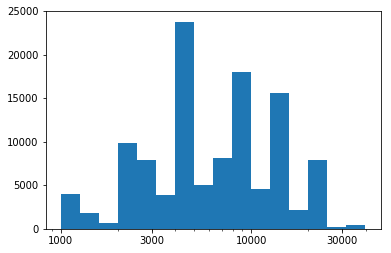

In [76]:
#create plot for variable in log form
bins = 10 ** np.arange(3, 4.54 + 0.1, 0.1)

ticks = [1000, 3000, 10000, 30000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_copy, x = 'LoanOriginalAmount', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);


In [78]:
#get stats for column
df_copy['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [77]:
# get stats for column in log10
np.log10(df_copy['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

The data for average loan amount is a little bit skewed to the left.  The average loan amount is $ 8,337 dollars. The maximum loan amount is $35,000 but the vast majority fall under $ 15,000 dollars

In [80]:
df_copy['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

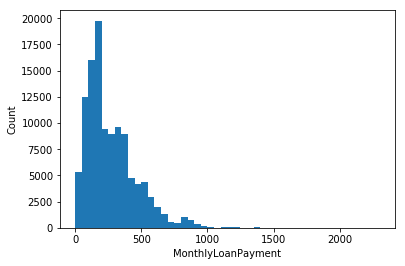

In [79]:
bins = np.arange(0, df_copy['MonthlyLoanPayment'].max() + 50, 50)
plt.hist(data = df_copy, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Count')
plt.show()


In [81]:
df_copy['MonthlyLoanPayment'].median()

217.74

The data is skewed to the right. The median payment is 217 dollars and athe average payment is 272 dollars

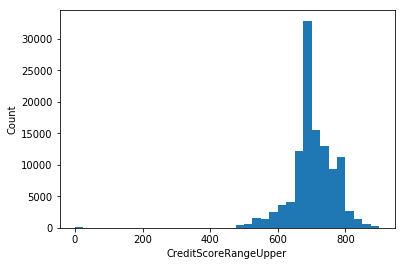

In [82]:
bins = np.arange(0, df_copy['CreditScoreRangeUpper'].max() + 25, 25)
plt.hist(data = df_copy, x = 'CreditScoreRangeUpper', bins = bins);
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('Count')
plt.show()

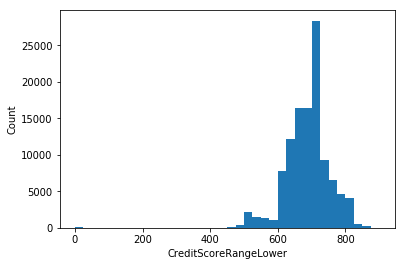

In [83]:
bins = np.arange(0, df_copy['CreditScoreRangeLower'].max() + 25, 25)
plt.hist(data = df_copy, x = 'CreditScoreRangeLower', bins = bins);
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Count')
plt.show()

In [84]:
df_copy['CreditScoreRangeLower'].describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [85]:
df_copy['CreditScoreRangeUpper'].describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

The credit score ranges are normally distributed.  Area of interest is how they correlate to the Prosper Score rating which is how Prosper determines risk.

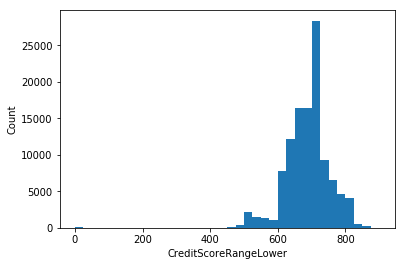

In [86]:
bins = np.arange(0, df_copy['CreditScoreRangeLower'].max() + 25, 25)
plt.hist(data = df_copy, x = 'CreditScoreRangeLower', bins = bins);
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Count')
plt.show()



In [87]:
df_copy['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

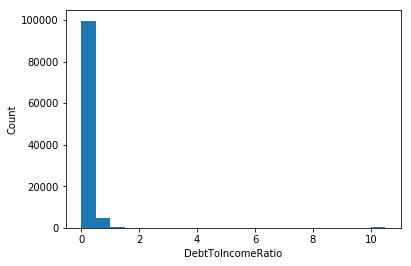

In [88]:
bins = np.arange(0, df_copy['DebtToIncomeRatio'].max() + 0.5, 0.5)
plt.hist(data = df_copy, x ='DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count')
plt.show();

Data heavily skewed to the right.  75 percent of the data is less than 1  and the max is 10.  Not sure of the reason but 10 is an outlier and requires further investigation but will be removed for now.

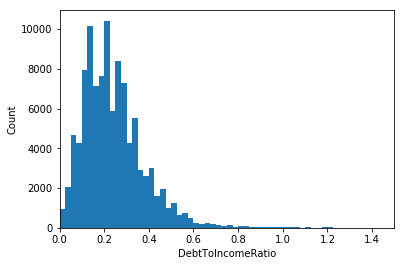

In [89]:
bins = np.arange(0, df_copy['DebtToIncomeRatio'].max() + 0.025, 0.025)
plt.hist(data = df_copy, x ='DebtToIncomeRatio', bins = bins)
plt.xlim(0,1.5)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count')
plt.show();

Data looks evenly distributed after removing the outliers.

In [90]:
df_copy['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [91]:
df_copy['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

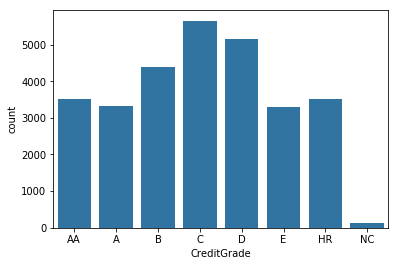

In [92]:
# plot credit grade

ranges = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >=21):
    credit_grade_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
    df_copy['CreditGrade'] = df_copy['CreditGrade'].astype(credit_grade_ranges)
else: # pre - v0.21
    df_copy['CreditGrade'] = df_copy['CreditGrade'].astype('category', ordered = True, categories = ranges)
    
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'CreditGrade', color = base_color);

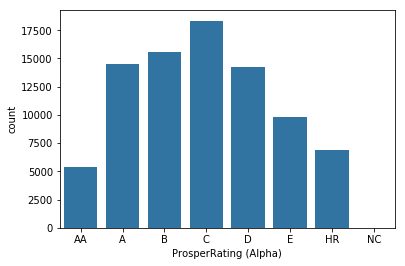

In [93]:
# plot Prosper Rating 

ranges = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >=21):
    credit_grade_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
    df_copy['ProsperRating (Alpha)'] = df_copy['ProsperRating (Alpha)'].astype(credit_grade_ranges)
else: # pre - v0.21
    df_copy['ProsperRating (Alpha)'] = df_copy['ProsperRating (Alpha)'].astype('category', ordered = True, categories = ranges)
    
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'ProsperRating (Alpha)', color = base_color);

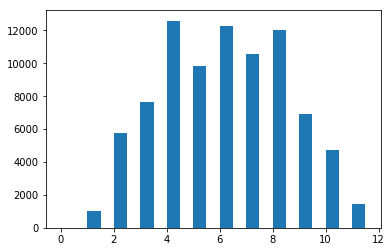

In [94]:
bin_edges = np.arange(0, df_copy['ProsperScore'].max() + 1, 0.5) 
base_color = sb.color_palette()[0]
plt.hist(data = df_copy, x = 'ProsperScore', color = base_color, bins = bin_edges);

Prosper Score is  a custom risk score ranging from 1-10 with 10 being the best or lowest risk score.  The data shows the distribution of scores is evenly distributed.

Prosper Rating was the new name for credit range.  The change was made at some point that is not specified.

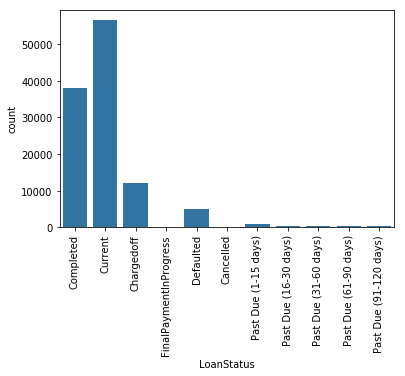

In [95]:
#plot for Loan status

ranges = ['Completed', 'Current', 'Chargedoff', 'FinalPaymentInProgress', 'Defaulted', 'Cancelled', 'Past Due (1-15 days)',
'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >=21):
    LoanStatus_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
    df_copy['LoanStatus'] = df_copy['LoanStatus'].astype(LoanStatus_ranges)
else: # pre - v0.21
    df_copy['LoanStatus'] = df_copy['LoanStatus'].astype('category', ordered = True, categories = ranges)
    
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'LoanStatus', color = base_color)
plt.xticks(rotation = 90);

In [97]:
df_copy['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

Vast majority of loans are either current or completed.  There is a large number of loans that have either defaulted or were charged-off.

In [96]:
sum(df['LoanStatus'].isnull())

16

In [100]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Other             3806
Part-time         1088
Retired            795
Not-employed         0
Name: EmploymentStatus, dtype: int64

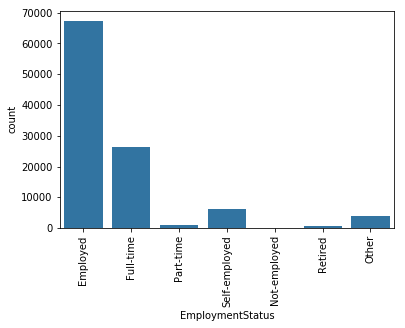

In [99]:
# plot Employment status

ranges = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Not-employed', 'Retired', 'Other']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >=21):
    EmploymentStatus_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
    df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].astype(EmploymentStatus_ranges)
else: # pre - v0.21
    df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].astype('category', ordered = True, categories = ranges)
    
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 90);

In [98]:
df_copy['EmploymentStatusDuration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

In [103]:
np.log10(df_copy['EmploymentStatusDuration'].describe())

C:\Users\ChristianByer\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.026582
mean     1.982595
std      1.975343
min          -inf
25%      1.414973
50%      1.826075
75%      2.136721
max      2.877947
Name: EmploymentStatusDuration, dtype: float64

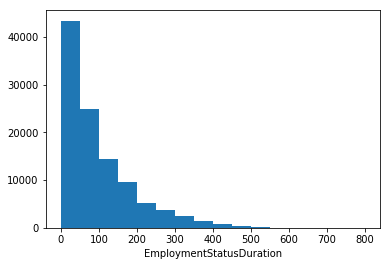

In [102]:
# plot employment status duration

bins = np.arange(0, df_copy['EmploymentStatusDuration'].max() + 50, 50)
plt.hist(data = df_copy, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('EmploymentStatusDuration')
plt.show()

Employment status duration is calculated in months.  Risk facters associated with employment status duration is an area of interest.  

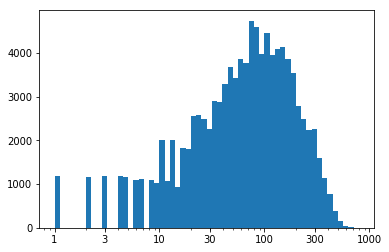

In [101]:
#employment status duration with log transformation
bins = 10 ** np.arange(0, 2.87 + 0.05, 0.05)

ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_copy, x = 'EmploymentStatusDuration', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);



In [104]:
df_copy['CurrentCreditLines'].dtypes

dtype('float64')

In [107]:
np.log10(df_copy['CurrentCreditLines'].describe())

C:\Users\ChristianByer\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.026668
mean     1.013562
std      0.737023
min          -inf
25%      0.845098
50%      1.000000
75%      1.113943
max      1.770852
Name: CurrentCreditLines, dtype: float64

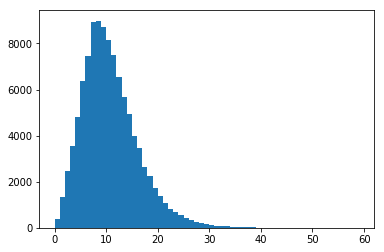

In [106]:
# plot current credit lines
bins = np.arange(0, df_copy['CurrentCreditLines'].max() +1, 1)

plt.hist(data = df_copy, x = 'CurrentCreditLines', bins = bins);

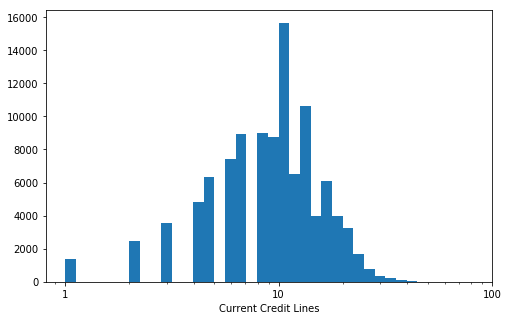

In [105]:
# there is a long tail distribution, let's put it in log scale

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_copy['CurrentCreditLines'].max()) +
                       log_binsize, log_binsize)

plt.figure(figsize = [8,5])
plt.hist(data = df_copy, x = 'CurrentCreditLines', bins = bins)
plt.xscale('log')
plt.xticks([1, 1e1, 1e2], [1, '10', '100'])
plt.xlabel('Current Credit Lines')
plt.show();

In [110]:
df_copy['InquiriesLast6Months'].describe()

count    113240.000000
mean          1.435085
std           2.437507
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         105.000000
Name: InquiriesLast6Months, dtype: float64

(array([1.11916e+05, 1.13000e+03, 1.60000e+02, 2.40000e+01, 6.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. ]),
 <a list of 10 Patch objects>)

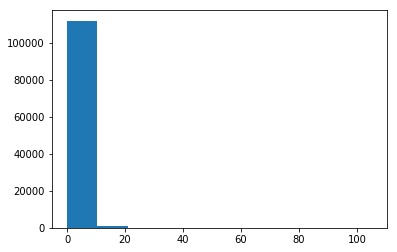

In [109]:
plt.hist(data = df_copy, x = 'InquiriesLast6Months')

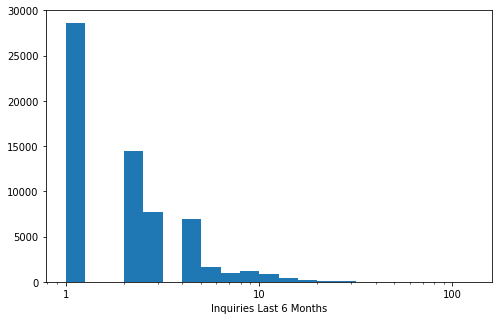

In [108]:
# scale transformation
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_copy['InquiriesLast6Months'].max()) +
                       log_binsize, log_binsize)

plt.figure(figsize = [8,5])
plt.hist(data = df_copy, x = 'InquiriesLast6Months', bins = bins)
plt.xscale('log')
plt.xticks([1, 1e1, 1e2], [1, '10', '100'])
plt.xlabel('Inquiries Last 6 Months')
plt.show();

In [112]:
df_copy['CurrentDelinquencies'].describe()

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

(array([1.11812e+05, 1.16200e+03, 2.05000e+02, 4.40000e+01, 9.00000e+00,
        1.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0. ,  8.3, 16.6, 24.9, 33.2, 41.5, 49.8, 58.1, 66.4, 74.7, 83. ]),
 <a list of 10 Patch objects>)

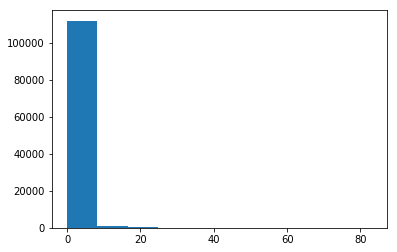

In [111]:
plt.hist(data = df_copy, x = 'CurrentDelinquencies')

Borrower characateristics such as current delinquencies, Current Credit Lines, and Inquiries last six months are areas of interest.  I want to see how these variables correlate with how the loans are performing.

# Univariate Analysis

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶



The loan original amount variable was highly skewed to the right.  I used a log transformation and the data resembeled more of a normal curve although there were large spikes at the 5k, 10k, 15k dollar mark.

The debt to income ratio also had an outlier of 10.00.  The vast majority of the data had a ratio of less than 1.  After excluding that outlier the data resembled a normal curve when plotted.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶


For the borrower characteristics such as Income Range, Prosper Score, Loan Status I had to change the data type to category to be able to graph it appropriately. 

I also had to clean the Listing Category variable by converting it from interger data type to its corresponding name as a string data type.

The most unsusual distribution was the dip in number of opened loans in the year 2009. At all other times the number of opend loans saw a steady increase.

# Bivariate Exploration

The key variable for any business is profit.  We will start there with the net principal loss over time.

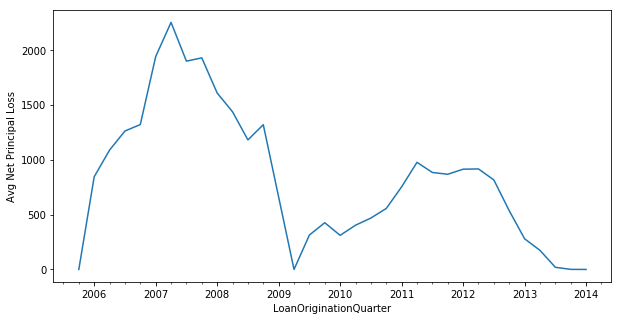

In [115]:
plt.figure(figsize = [10,5])
df_copy.groupby('LoanOriginationQuarter')['LP_NetPrincipalLoss'].mean().plot()
plt.ylabel('Avg Net Principal Loss');

The data shows that losses went up from 2006 to 2008 with a large dip in 2009.  After that dip in 2009 they have held steady and not climbed back up to the average before 2009. The area of interest is what happened in 2009 that caused the change?

Next we will look at borrower characteristics over time to see if there was any change before and after 2009.

We will start with credit score.

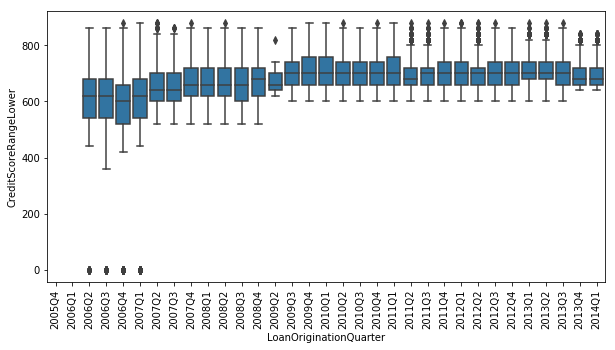

In [114]:
# box plot loan origination quarter by credit score range lower
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_copy.sort_values('LoanOriginationQuarter'), 
              x = 'LoanOriginationQuarter', y = 'CreditScoreRangeLower',
          color = base_color)
plt.xticks(rotation = 90);


It looks like there was no minimun credit score before 2007 as loans were opend up with a credit score of 0.  The credit score average steadily rose until 2009 and after that remained steady.  This lends me to believe a minimum credit score was set in place as of 2009.  This makes sense as principal loss went down at the same time.  The analysis is makes sense as borrowers with higher credit scores carry less risk and are more likely to pay back the loans.

Now we will look at debt-to-income ratio.

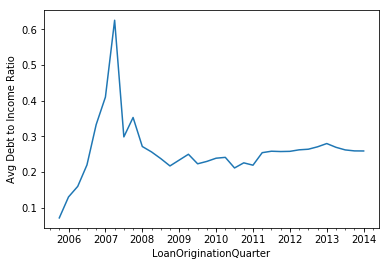

In [113]:
df_copy.groupby('LoanOriginationQuarter')['DebtToIncomeRatio'].mean().plot()
plt.ylabel('Avg Debt to Income Ratio');

There was a large spike betweet 2006 and 2008.  After 2009 it remained steady.  The trend is showing Prosper having stricter policies for giving out loans after 2009.

Now we will look at how loans are actually performing. If a loan is paid off or current it will be categorized as "Achieving".  If if is anything else including defaulted or charged-off it will be categorized as "Non-Achieving".

In [117]:
def change_to_name(df_copy):
    if df_copy['LoanStatus'] == 'Completed':
        return 'Achieving'
    elif df_copy['LoanStatus'] == 'Current':
        return 'Achieving'
    elif df_copy['LoanStatus'] == 'FinalPaymentInProgress':
        return 'Achieving'
    else:
        return 'Non-Achieving'
        
# create different values for loan status
df_copy['LoanStatus'] = df_copy.apply(change_to_name, axis = 1)
df_copy['LoanStatus'].value_counts()

Achieving        94855
Non-Achieving    19082
Name: LoanStatus, dtype: int64

In [119]:
#create new dataframe that with columns of interest

dfnew = (pd.DataFrame({'count' : df_copy.groupby(['LoanOriginationQuarter', 'LoanStatus']).size()}))
dfnew = dfnew.reset_index()
dfnew

,LoanOriginationQuarter,LoanStatus,count
0,2005Q4,Achieving,22
1,2006Q1,Achieving,229
2,2006Q1,Non-Achieving,86
3,2006Q2,Achieving,810
4,2006Q2,Non-Achieving,444
5,2006Q3,Achieving,1165
6,2006Q3,Non-Achieving,769
7,2006Q4,Achieving,1373
8,2006Q4,Non-Achieving,1030
9,2007Q1,Achieving,1788


In [120]:
sub_dfnew = dfnew.groupby(['LoanOriginationQuarter', 'LoanStatus']).sum()['count']
sub_dfnew

LoanOriginationQuarter  LoanStatus   
2005Q4                  Achieving           22
2006Q1                  Achieving          229
                        Non-Achieving       86
2006Q2                  Achieving          810
                        Non-Achieving      444
2006Q3                  Achieving         1165
                        Non-Achieving      769
2006Q4                  Achieving         1373
                        Non-Achieving     1030
2007Q1                  Achieving         1788
                        Non-Achieving     1291
2007Q2                  Achieving         1853
                        Non-Achieving     1265
2007Q3                  Achieving         1629
                        Non-Achieving     1042
2007Q4                  Achieving         1666
                        Non-Achieving      926
2008Q1                  Achieving         2038
                        Non-Achieving     1036
2008Q2                  Achieving         2867
                      

In [121]:
sub_dfnew2 = sub_dfnew / sub_dfnew.groupby(level = 0).sum()
sub_dfnew2

LoanOriginationQuarter  LoanStatus   
2005Q4                  Achieving        1.000000
2006Q1                  Achieving        0.726984
                        Non-Achieving    0.273016
2006Q2                  Achieving        0.645933
                        Non-Achieving    0.354067
2006Q3                  Achieving        0.602378
                        Non-Achieving    0.397622
2006Q4                  Achieving        0.571369
                        Non-Achieving    0.428631
2007Q1                  Achieving        0.580708
                        Non-Achieving    0.419292
2007Q2                  Achieving        0.594291
                        Non-Achieving    0.405709
2007Q3                  Achieving        0.609884
                        Non-Achieving    0.390116
2007Q4                  Achieving        0.642747
                        Non-Achieving    0.357253
2008Q1                  Achieving        0.662980
                        Non-Achieving    0.337020
2008Q2      

In [122]:
dfnew2 = sub_dfnew2.unstack()
dfnew2

LoanStatus,Achieving,Non-Achieving
LoanOriginationQuarter,,
2005Q4,1.000000,NaN
2006Q1,0.726984,0.273016
2006Q2,0.645933,0.354067
2006Q3,0.602378,0.397622
2006Q4,0.571369,0.428631
2007Q1,0.580708,0.419292
2007Q2,0.594291,0.405709
2007Q3,0.609884,0.390116
2007Q4,0.642747,0.357253


This is a graph of the proportiong of Achieving loans and Non-Achiving loans over time

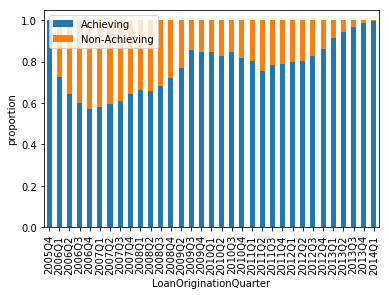

In [123]:
#plot percentage of non-achieving loans by quarter
dfnew2.plot(kind = 'bar', stacked = True);
plt.gca().legend(('Achieving', 'Non-Achieving'))
plt.ylabel('proportion')
plt.show()

The data shows that there was an increase in "Non-Achieving" loans from 2005 to 2007 before generally the number of "Non-Achieving" loans decreased.  After 2009 the proportion of Non-Achieving loans does not rise above any proportion prior to 2009.  This confirms the stricter lending policies after 2009.  The borrowers after 2009 are considered less-risky and the data confirms it.

In [124]:
dfnew2.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 33 entries, 2005Q4 to 2014Q1
Freq: Q-DEC
Data columns (total 2 columns):
Achieving        33 non-null float64
Non-Achieving    32 non-null float64
dtypes: float64(2)
memory usage: 792.0 bytes


Now we will look at Achieving and Non-Achieving by Income Range

In [127]:
dfincome = (pd.DataFrame({'count' : df_copy.groupby(['IncomeRange', 'LoanStatus']).size()}).reset_index())
dfincome.head(1)

,IncomeRange,LoanStatus,count
0,Not displayed,Achieving,4610


In [128]:
sub_dfincome = (dfincome.groupby(['IncomeRange', 'LoanStatus'])['count'].sum().rename("percent"))
sub_dfincome.head(1)

IncomeRange    LoanStatus
Not displayed  Achieving     4610
Name: percent, dtype: int64

In [129]:
sub_dfincome2 = sub_dfincome / (sub_dfincome.groupby(level = 0).sum())
sub_dfincome2.head(1)

IncomeRange    LoanStatus
Not displayed  Achieving     0.59553
Name: percent, dtype: float64

In [130]:
sub_dfincome3 = (pd.Series.to_frame(sub_dfincome2))
sub_dfincome3.head(1)

,,percent
IncomeRange,LoanStatus,
Not displayed,Achieving,0.59553


In [131]:

sub_dfincome4 = (sub_dfincome3.unstack())
sub_dfincome4.head(1)

percent              
LoanStatus    Achieving Non-Achieving
IncomeRange                          
Not displayed   0.59553       0.40447

In [132]:
sub_dfincome4.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 7 entries, Not displayed to $100,000+
Data columns (total 2 columns):
(percent, Achieving)        7 non-null float64
(percent, Non-Achieving)    7 non-null float64
dtypes: float64(2)
memory usage: 503.0 bytes


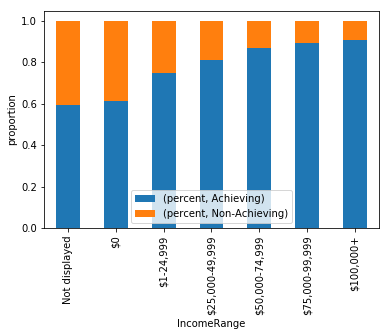

In [133]:
sub_dfincome4.plot(kind = 'bar', stacked = True);
plt.gca().legend(('Achieving', 'Non-Achieving'))
plt.ylabel('proportion')
plt.legend(loc = 8)
plt.show()

The data shows the higher the income the higher the proportion of Achieving loans.

Now we will look at what best predicts Achieving from Non-Achieving loans.

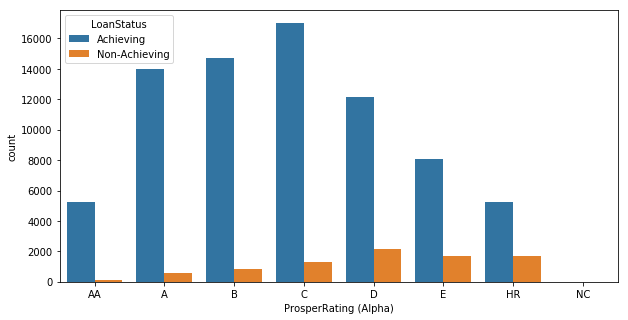

In [135]:
plt.figure(figsize = [10,5])
sb.countplot(data = df_copy, x = 'ProsperRating (Alpha)', hue = 'LoanStatus')
plt.show();

This plot shows the absolute number of "Achieving" and "Non-Achieving" loans by Prosper Rating. 

In [134]:
dfnew3 = (pd.DataFrame({'count' : df_copy.groupby(['ProsperRating (Alpha)', 'LoanStatus']).size()}).reset_index())
dfnew3.head(1)

,ProsperRating (Alpha),LoanStatus,count
0,AA,Achieving,5264


In [136]:
count_Prosper = (dfnew3.groupby(['ProsperRating (Alpha)', 'LoanStatus'])['count'].sum().rename("percent"))
count_Prosper.head(1)

ProsperRating (Alpha)  LoanStatus
AA                     Achieving     5264
Name: percent, dtype: int64

In [137]:
count_Prosper = count_Prosper / (count_Prosper.groupby(level = 0).sum())
count_Prosper.head(1)

ProsperRating (Alpha)  LoanStatus
AA                     Achieving     0.979896
Name: percent, dtype: float64

In [138]:
count_Prosper =(pd.Series.to_frame(count_Prosper))
count_Prosper.head(1)

,,percent
ProsperRating (Alpha),LoanStatus,
AA,Achieving,0.979896


In [139]:
sub_cp = (count_Prosper.unstack())
sub_cp.head(1)

percent              
LoanStatus            Achieving Non-Achieving
ProsperRating (Alpha)                        
AA                     0.979896      0.020104

In [140]:
sub_cp.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 7 entries, AA to HR
Data columns (total 2 columns):
(percent, Achieving)        7 non-null float64
(percent, Non-Achieving)    7 non-null float64
dtypes: float64(2)
memory usage: 503.0 bytes


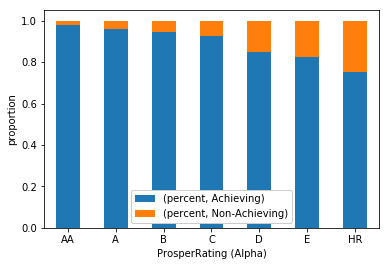

In [141]:
sub_cp.plot(kind = 'bar', stacked = True);
plt.gca().legend(('Achieving', 'Non-Achieving'))
plt.ylabel('proportion')
plt.xticks(rotation = 360)
plt.legend(loc = 8, framealpha = 1)
plt.show()

The data shows the Prosper Rating has predicted the risk factor appropriately.  The higher the Prosper Rating the lower the proportion of "Non-Achieving" loans.

Predicting Loan Status

Prosper Score is the custom risk variable assigned to each loan. We will take a look to see if it predicts appropriately.

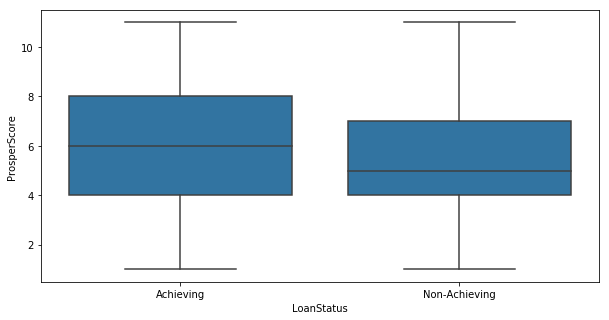

In [143]:
# first with Prosper Score
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = 'LoanStatus', y = 'ProsperScore', color = base_color)

Achieving loans have a higher average Prosper Score than Non-Achieving.  The factors that go into creating the score seem to be doing the job correctly.

We will look at credit score to see if it predicts Achieving to Non Achieving

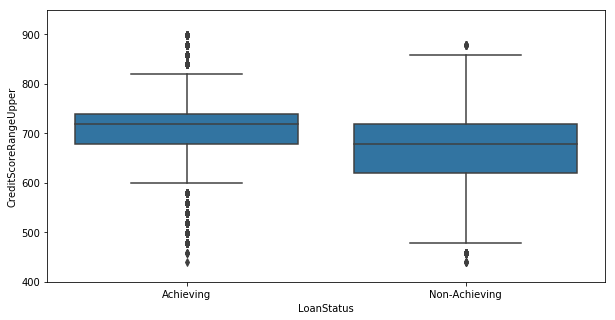

In [142]:
# first with Credit Score
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.ylim(400, df_copy['CreditScoreRangeUpper'].max() + 50);

The Achieving loans have a higher avereage than the Non-Achieving loans.  The higher the credit score the more likely the loan will achieve.

Let's look at how these borrower characteristics affect Prosper Rating.  Lets start with Debt-to-Income Ratio.

(0, 1)

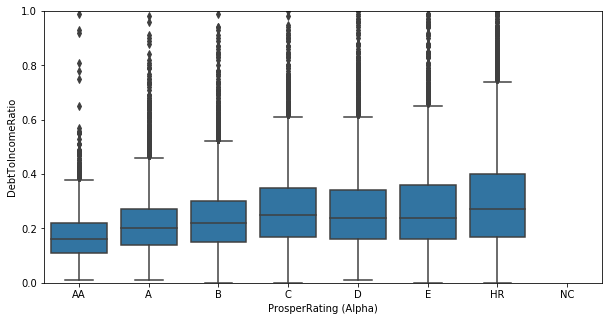

In [144]:
# make the plot
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', color = base_color)
plt.ylim(0, 1)

The debt-to-Income ratio is slightly lower for non-riskier Prosper Ratings but it seems to generally be the same.

Lets look at Prosper Rating and credit score.

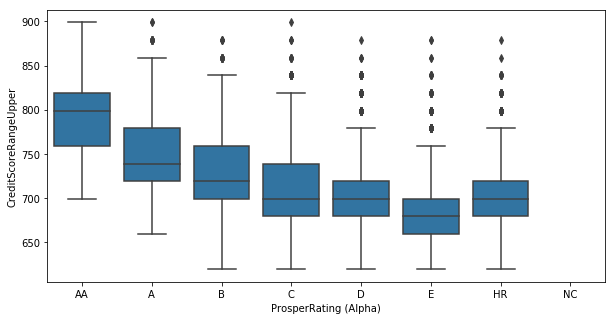

In [146]:
# make the plot
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = 'ProsperRating (Alpha)', y = 'CreditScoreRangeUpper', color = base_color)


Credit Score seems to correlate strongly wih the Prosper Rating as you can see a substansial decrease in average credit scores at the ratings get worse, more-risky.  The "HR" column does seem to have a higher credit score average than "E" indicating other factors other than credit score for Prosper Rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The biggest insight was that Prosper was more strict with the risk assessment for their borrrowers after 2009.  Borrower characteristics such as credit score and debt to income ratio all changed after 2009.  



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The biggest suprise was that debt-to-income ratio is not a predictor of risk assessment.  There is not a strong correlation with debt to income and whether a risk of Acheiving or Non-Achieving.  


# Multivariate Plot Section

In this section I will explore the relationship of the vrariables and how the predict loan status.

I will start with loan amount and credit score.

<Figure size 720x360 with 0 Axes>

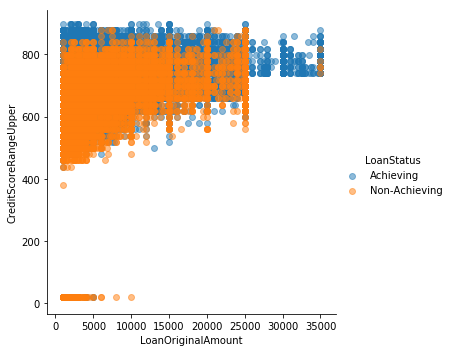

In [145]:
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = df_copy, hue = 'LoanStatus', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'CreditScoreRangeUpper', alpha = 0.5)
g.add_legend()
#plt.xscale('log')
#plt.xticks(ticks, ticks);

You can see original loan amount is not a great predictor of loan status as there is no clear relationship in the plot.  The lower the credit score there seems to be more non-achieving loans.  This makes sense as a lower credit score means the borrower is is less-risky.

Next we will look at Income range and borrower rate

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

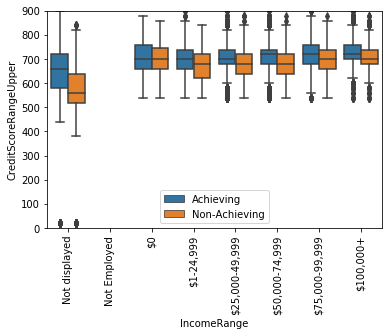

In [148]:
ax = sb.boxplot(data = df_copy, x = 'IncomeRange', y = 'CreditScoreRangeUpper',
               hue = 'LoanStatus')
ax.legend(loc = 8)
plt.ylim(0,900)
plt.xticks(rotation = 90)

There is not much of a difference within credit scores on different income levels.  Although you can see that within the income levels, loans that are achieving have a higher average credit score than those that are non-achieving.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

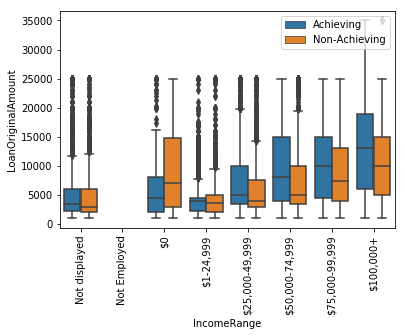

In [147]:
ax = sb.boxplot(data = df_copy, x = 'IncomeRange', y = 'LoanOriginalAmount',
               hue = 'LoanStatus')
ax.legend(loc = 1)
plt.xticks(rotation = 90)

The data shows borrowers with a higher income tend to take out larger loan amounts.  Within the income levels the achieving loans seem to have a higher loan amount than the non-achieving loans.  I don't know if this tells me anything.

(0, 900)

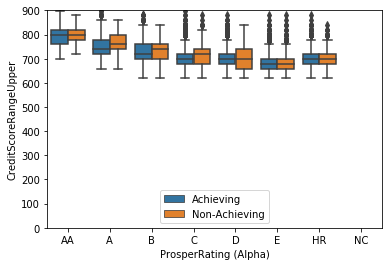

In [149]:
ax = sb.boxplot(data = df_copy, x = 'ProsperRating (Alpha)', y = 'CreditScoreRangeUpper',
               hue = 'LoanStatus')
ax.legend(loc = 8)
plt.ylim(0,900)

You can see that the higher Prosper Ratings have a higher credit score.  No suprise here.  What is suprising is within some of the Prosper ratings the non-achieving loans have higher credit scores than the achieving loans.  This needs to be further explored to see the proportion of achieving to non-achieving loans.

Now lets take a look at Prosper Rating, credit score, and Net Principal loss.

In [150]:
# have to do only for after 2009
pre2009 = df_copy.groupby(['ProsperRating (Alpha)', 'CreditScoreRangeUpper']) \
                .apply(lambda x: len(x.query("'2009-01-01' >= LoanOriginationDate"))> 0) \
                .reset_index()

(0, 900)

<Figure size 720x360 with 0 Axes>

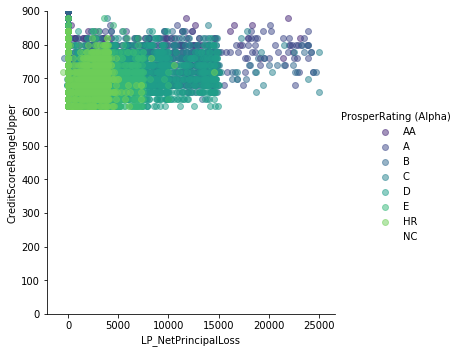

In [151]:


base_color = sb.color_palette('viridis', 9)
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = df_copy.query('LoanOriginationDate >= "2009-01-01"'), hue = 'ProsperRating (Alpha)', height = 5, palette = 'viridis')
g.map(plt.scatter, 'LP_NetPrincipalLoss', 'CreditScoreRangeUpper', alpha = 0.5)
g.add_legend()
plt.ylim(0,900)

This data is post 2009 when Prosper changed their loan requirements and renamed their custome risk grade to Prosper Rating.  You can see the chart is mostly green.  It shows green for lower credit score and more principal loss.  There are not as many blue dots.  But the highest principal loss is blue.  

Now we will look at pre 2009.

<Figure size 720x360 with 0 Axes>

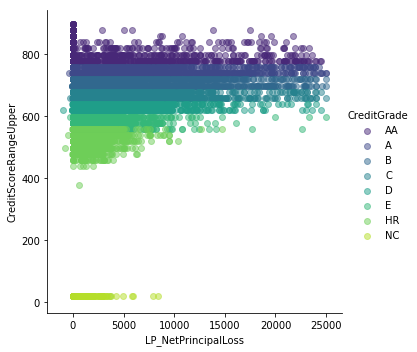

In [152]:
base_color = sb.color_palette('viridis', 9)
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = df_copy.query('LoanOriginationDate <= "2009-01-01"'), hue = 'CreditGrade', height = 5, palette = 'viridis')
g.map(plt.scatter, 'LP_NetPrincipalLoss', 'CreditScoreRangeUpper', alpha = 0.5)
g.add_legend()


Principal loss seems to be evenly distributed.  Although the highest loss amount is darker in color.  This means the less-risk credit classes.  Prior to 2009 the company lost money.

In [155]:
# create dataframe with columns of interest
dfrating = (pd.DataFrame({'count' : df_copy.groupby(['LoanOriginationQuarter', 'LoanStatus', 'ProsperRating (Alpha)']).size()}).reset_index())
dfrating.head(5)


,LoanOriginationQuarter,LoanStatus,ProsperRating (Alpha),count
0,2009Q3,Achieving,AA,81
1,2009Q3,Achieving,A,121
2,2009Q3,Achieving,B,31
3,2009Q3,Achieving,C,97
4,2009Q3,Achieving,D,75


In [156]:
# gets count of each variable for Loan Status column
count_rating = (dfrating.groupby(['LoanOriginationQuarter','ProsperRating (Alpha)', 'LoanStatus'])['count'].sum().rename("percent"))
count_rating.head()

LoanOriginationQuarter  ProsperRating (Alpha)  LoanStatus   
2009Q3                  AA                     Achieving         81
                                               Non-Achieving      6
                        A                      Achieving        121
                                               Non-Achieving     13
                        B                      Achieving         31
Name: percent, dtype: int64

In [157]:
# gets proportion of each variable in Prosperrating column
count_rating = count_rating / (count_rating.groupby(level = 0).sum())
count_rating.head()

LoanOriginationQuarter  ProsperRating (Alpha)  LoanStatus   
2009Q3                  AA                     Achieving        0.144902
                                               Non-Achieving    0.010733
                        A                      Achieving        0.216458
                                               Non-Achieving    0.023256
                        B                      Achieving        0.055456
Name: percent, dtype: float64

In [158]:
# converts count_rating series info a Dataframe
cr = (pd.Series.to_frame(count_rating))
cr.head()

percent
LoanOriginationQuarter ProsperRating (Alpha) LoanStatus             
2009Q3                 AA                    Achieving      0.144902
                                             Non-Achieving  0.010733
                       A                     Achieving      0.216458
                                             Non-Achieving  0.023256
                       B                     Achieving      0.055456

In [159]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 266 entries, (2009Q3, AA, Achieving) to (2014Q1, HR, Non-Achieving)
Data columns (total 1 columns):
percent    266 non-null float64
dtypes: float64(1)
memory usage: 4.3+ KB


In [160]:
#reset index for plotting purposes
dfcr = cr.reset_index()
dfcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
LoanOriginationQuarter    266 non-null object
ProsperRating (Alpha)     266 non-null category
LoanStatus                266 non-null object
percent                   266 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 6.9+ KB


In [161]:
dfcr.tail()

,LoanOriginationQuarter,ProsperRating (Alpha),LoanStatus,percent
261,2014Q1,D,Non-Achieving,0.000164
262,2014Q1,E,Achieving,0.069422
263,2014Q1,E,Non-Achieving,0.000246
264,2014Q1,HR,Achieving,0.008216
265,2014Q1,HR,Non-Achieving,0.000246


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

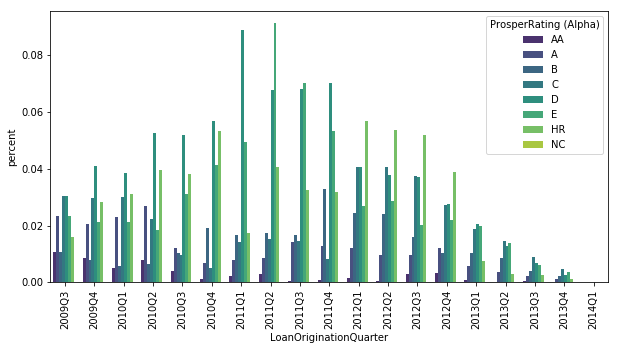

In [164]:
# plot proportion of Non-Achieving loans by Prosper Rating by quarter
plt.figure(figsize = [10, 5])
sb.barplot(data = dfcr.query('LoanStatus == "Non-Achieving"'), x = 'LoanOriginationQuarter', y = 'percent', hue = 'ProsperRating (Alpha)',
          palette = 'viridis')
plt.xticks(rotation = 90)

The graph shows that the lower risk Prosper Rating always outperform the higher risk ratings.


C:\Users\ChristianByer\Anaconda2\lib\site-packages\matplotlib\legend.py:504: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


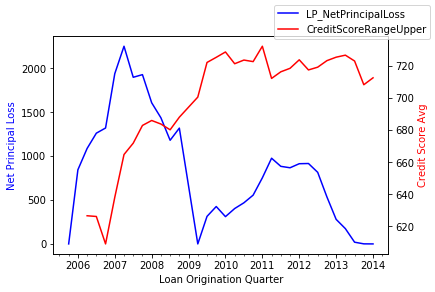

In [162]:
fig, ax1 = plt.subplots()
ax = df_copy.groupby('LoanOriginationQuarter')['LP_NetPrincipalLoss'].mean().plot(color = 'blue')
ax2 = df_copy.groupby('LoanOriginationQuarter')['CreditScoreRangeUpper'].mean().plot(secondary_y = True, color = 'red')
fig = ax.get_figure()
ax.set_xlabel('Loan Origination Quarter')
ax.set_ylabel('Net Principal Loss', color = 'b')
ax2.set_ylabel('Credit Score Avg', color = 'r')
fig.legend(loc = "best")


This chart shows how net pricipal loss went down over time and credit scores went up over time

# MultiVariate Analysis

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationships I observed were how credit score was the best predictor of loan status.  The better the credit score the more likely the loan was considered Achieving.  I also saw there was a change in loan requirements after 2009.  This was the year the company increased the minimum credit score to be able to obtain a loan and in turn saw the company lose less money.  

## Were there any interesting or surprising interactions between features?

I am suprised by how much variance there is from quarter to quarter of the proportion of achieving loans to unachieving loans.